### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

### Importing dataset

In [2]:
df_adv = pd.read_csv('Advertising.csv')

In [3]:
#Dimension of the dataset
df_adv.shape

(200, 5)

In [4]:
df_adv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Understanding the variables

In [5]:
df_adv.describe().columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Relation between variables

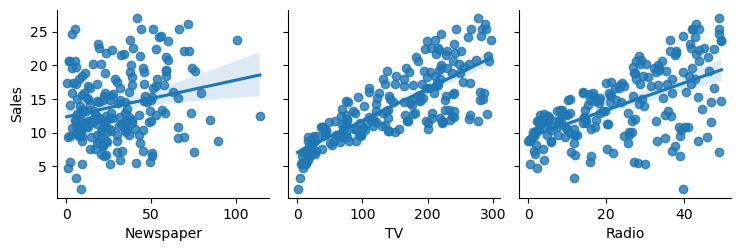

In [7]:
# Scatter plots to check the linearity assumption 
#between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)

sns.pairplot(df_adv, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

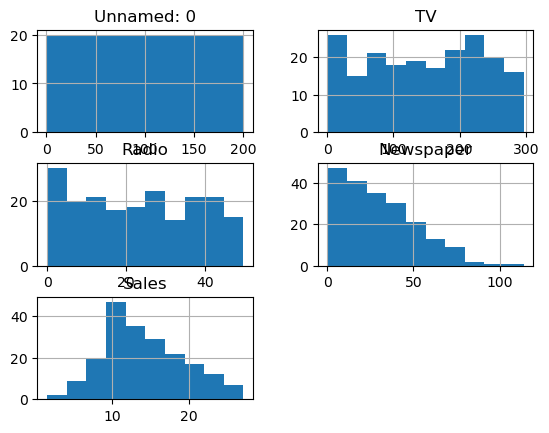

In [8]:
# Histograms to check the normality assumption of Sales
df_adv.hist()
plt.show()

### heatmap

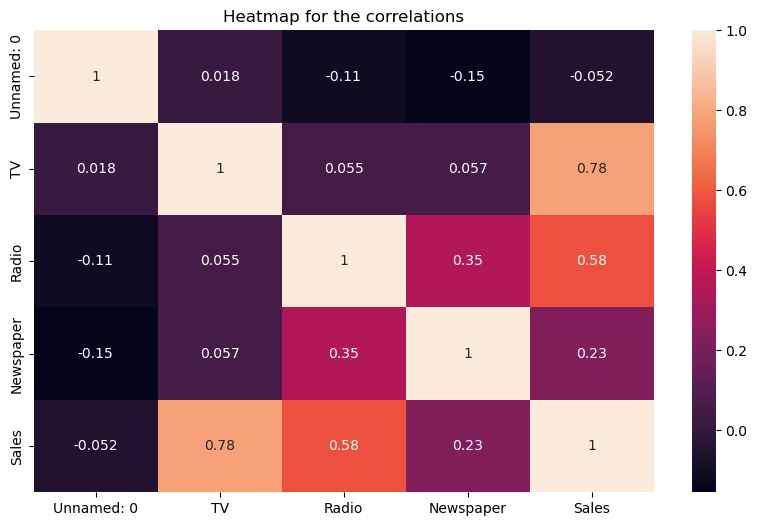

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_adv.corr(),annot=True)
plt.title("Heatmap for the correlations")
plt.show()

### Model Selection

In [10]:
# Creating a Linear Regression model
model = LinearRegression()

### To train the model

In [11]:
# Splitting the dataset into training and testing sets
X = df_adv[['TV', 'Radio', 'Newspaper']]
y = df_adv['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set

y_pred = model.predict(X_test)

### Performance evaluation 

In [13]:
# Evaluating the model performance

mse = mean_squared_error(y_test, y_pred) #Mean Squared Error
rmse = np.sqrt(mse) #Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.2f}")

R-squared: 0.90


### Visualization

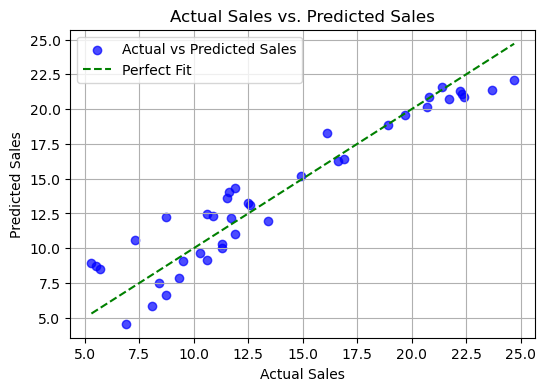

In [14]:
# Visualize the model's predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs Predicted Sales')
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='green',  linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [15]:
# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficients:
TV: 0.04
Radio: 0.19
Newspaper: 0.00
Intercept: 2.98


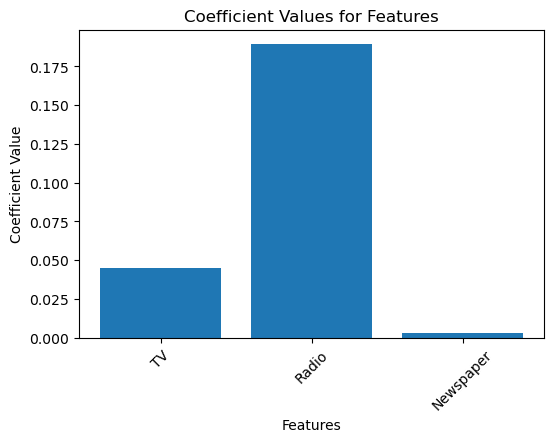

In [16]:
# Coefficient Visualization
plt.figure(figsize=(6, 4))
plt.bar(X.columns, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Features")
plt.xticks(rotation=45)
plt.show()

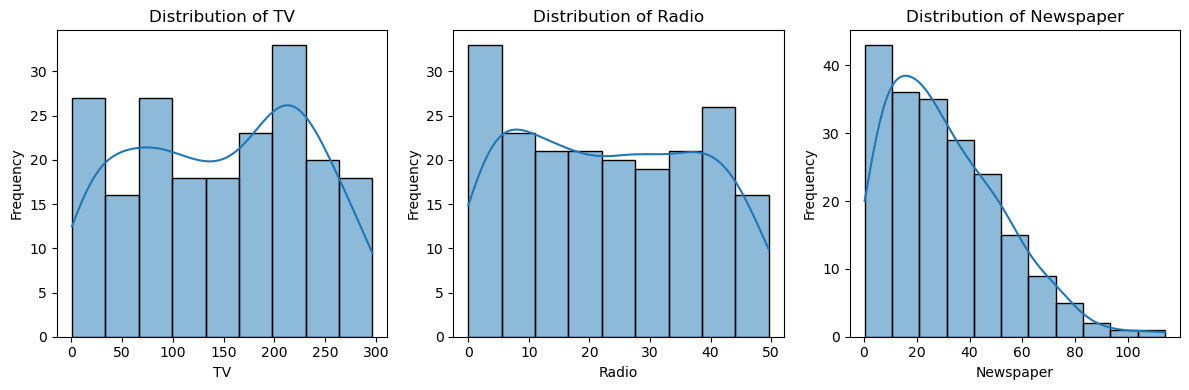

In [17]:
# Feature Distribution Plots
plt.figure(figsize=(12, 4))
for i, feature in enumerate(X.columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_adv[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [18]:
# Sample new data with the same feature columns as the original dataset
new_advDf = pd.DataFrame({
    'TV': [105.2, 50.6, 200.3],
    'Radio': [40.6, 20.5, 60.7],
    'Newspaper': [30.2, 21.0, 12.4]
})

In [19]:
npredictions = model.predict(new_advDf)

# Display the predictions for the new data
print("Predictions for the Data:")
print(npredictions)

Predictions for the Data:
[15.44931743  9.17886294 23.4567673 ]
